# LOAN PREDICTION

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

import statsmodels
import statsmodels.api as sm
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [2]:
## functions
score_card= pd.DataFrame(columns=['Model Name','Accuracy Score', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Kappa Score', 'f1-score'])

def update_score_card(Model_name,model,x_test,y_test, cutoff=0.5):
    y_pred_prob =model.predict(x_test)
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    global score_card
    
    score_card = score_card.append({'Model Name':Model_name,
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'F1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return score_card

In [3]:
def get_train_report(model, X_train, y_train):
    train_preds = model.predict(X_train)
    return(classification_report(y_train, train_preds))

In [4]:
def get_test_report(model, X_test, y_test):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

In [5]:
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

In [6]:
def plot_roc(model, X_test, y_test):
    y_pred_prob = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

In [7]:
plt.rcParams['figure.figsize'] = [15,8]

In [8]:
df = pd.read_csv('train_loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,nan,360.000000,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y


In [9]:
df.shape

(614, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# Handling Missing values in Categorical Variables

In [13]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [14]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# Handling Missing values in Numerical Variables

In [16]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [17]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [18]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
df = df.drop(columns=['Loan_ID'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.000000,128.000000,360.000000,1.000000,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
4,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y


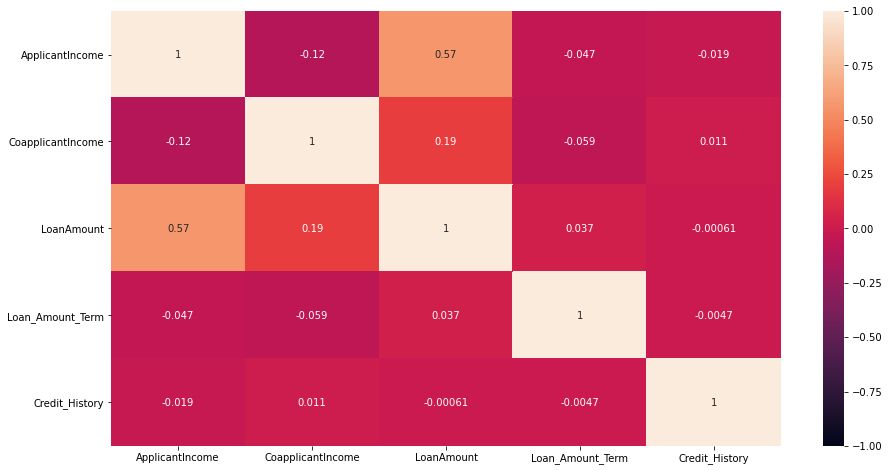

In [20]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [22]:
# Numerical Variables
df_num = df.select_dtypes(np.number)
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.000000,128.000000,360.000000,1.000000
1,4583,1508.000000,128.000000,360.000000,1.000000
2,3000,0.000000,66.000000,360.000000,1.000000
3,2583,2358.000000,120.000000,360.000000,1.000000
4,6000,0.000000,141.000000,360.000000,1.000000


In [23]:
df_num.shape

(614, 5)

In [24]:
df_num.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

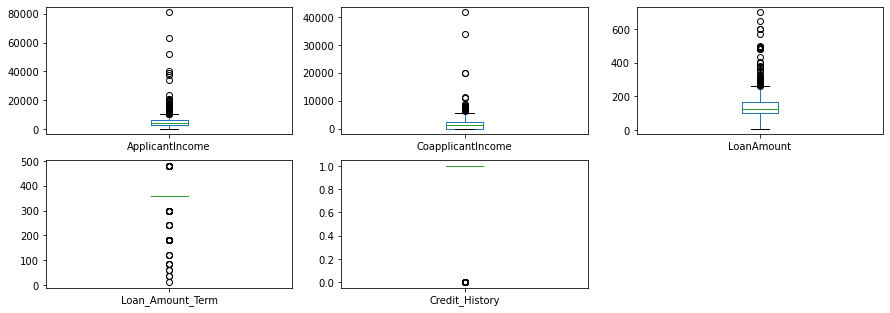

In [25]:
# Handling Outliers
df_num.plot(kind='box',subplots=True,layout=(3,3))
plt.show()

In [26]:
# Dummy Encoding
df_cat = df.select_dtypes('object')
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [27]:
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()
df_cat['Labelled_Gender'] = labels.fit_transform(df_cat['Gender'])
df_cat['Labelled_Married'] = labels.fit_transform(df_cat['Married'])
df_cat['Labelled_Dependents'] = labels.fit_transform(df_cat['Dependents'])
df_cat['Labelled_Education'] = labels.fit_transform(df_cat['Education'])
df_cat['Labelled_Self_Employed'] = labels.fit_transform(df_cat['Self_Employed'])
df_cat['Labelled_Property_Area'] = labels.fit_transform(df_cat['Property_Area'])
df_cat['Labelled_Loan_Status'] = labels.fit_transform(df_cat['Loan_Status'])
df_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Labelled_Gender,Labelled_Married,Labelled_Dependents,Labelled_Education,Labelled_Self_Employed,Labelled_Property_Area,Labelled_Loan_Status
0,Male,No,0,Graduate,No,Urban,Y,1,0,0,0,0,2,1
1,Male,Yes,1,Graduate,No,Rural,N,1,1,1,0,0,0,0
2,Male,Yes,0,Graduate,Yes,Urban,Y,1,1,0,0,1,2,1
3,Male,Yes,0,Not Graduate,No,Urban,Y,1,1,0,1,0,2,1
4,Male,No,0,Graduate,No,Urban,Y,1,0,0,0,0,2,1


In [28]:
df_cat = df_cat.drop(columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'])
df_cat.head()

,Labelled_Gender,Labelled_Married,Labelled_Dependents,Labelled_Education,Labelled_Self_Employed,Labelled_Property_Area,Labelled_Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


In [29]:
df1 = pd.concat([df_num, df_cat], axis = 1)
df1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Labelled_Gender,Labelled_Married,Labelled_Dependents,Labelled_Education,Labelled_Self_Employed,Labelled_Property_Area,Labelled_Loan_Status
0,5849,0.000000,128.000000,360.000000,1.000000,1,0,0,0,0,2,1
1,4583,1508.000000,128.000000,360.000000,1.000000,1,1,1,0,0,0,0
2,3000,0.000000,66.000000,360.000000,1.000000,1,1,0,0,1,2,1
3,2583,2358.000000,120.000000,360.000000,1.000000,1,1,0,1,0,2,1
4,6000,0.000000,141.000000,360.000000,1.000000,1,0,0,0,0,2,1


In [30]:
df1.dtypes

ApplicantIncome             int64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term          float64
Credit_History            float64
Labelled_Gender             int32
Labelled_Married            int32
Labelled_Dependents         int32
Labelled_Education          int32
Labelled_Self_Employed      int32
Labelled_Property_Area      int32
Labelled_Loan_Status        int32
dtype: object

In [31]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Labelled_Gender,Labelled_Married,Labelled_Dependents,Labelled_Education,Labelled_Self_Employed,Labelled_Property_Area,Labelled_Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.817590,0.653094,0.744300,0.218241,0.133550,1.037459,0.687296
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.386497,0.476373,1.009623,0.413389,0.340446,0.787482,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000


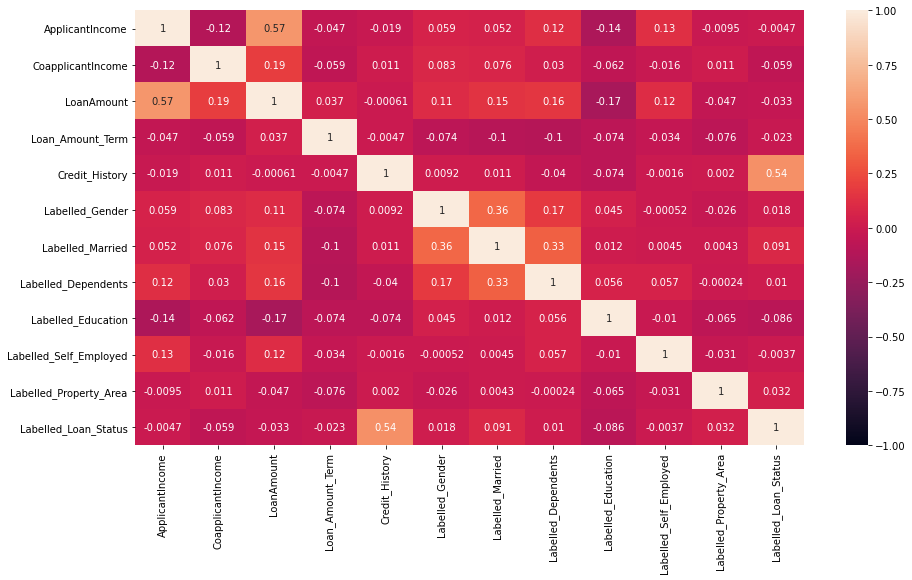

In [32]:
sns.heatmap(df1.corr(),vmin=-1,vmax=1,annot=True)

In [33]:
df1.isnull().sum()

ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Labelled_Gender           0
Labelled_Married          0
Labelled_Dependents       0
Labelled_Education        0
Labelled_Self_Employed    0
Labelled_Property_Area    0
Labelled_Loan_Status      0
dtype: int64

Since the ranges are large, we scale the dataset

In [34]:
X = df1.drop(columns=['Labelled_Loan_Status'])
Y = df1['Labelled_Loan_Status']
Y.value_counts()

1    422
0    192
Name: Labelled_Loan_Status, dtype: int64

# Logistic Regression

In [35]:
X = sm.add_constant(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 10, test_size = 0.2)
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (491, 12)
y_train (491,)
X_test (123, 12)
y_test (123,)


In [37]:
logreg = sm.Logit(y_train, X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.462290
         Iterations 6
                            Logit Regression Results                            
Dep. Variable:     Labelled_Loan_Status   No. Observations:                  491
Model:                            Logit   Df Residuals:                      479
Method:                             MLE   Df Model:                           11
Date:                  Sun, 04 Apr 2021   Pseudo R-squ.:                  0.2605
Time:                          23:47:20   Log-Likelihood:                -226.98
converged:                         True   LL-Null:                       -306.94
Covariance Type:              nonrobust   LLR p-value:                 1.391e-28
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.6101      0.920     -2.836      0.005  

In [38]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 
df_odds

,Odds
const,0.073530
ApplicantIncome,1.000005
CoapplicantIncome,0.999946
LoanAmount,0.999020
Loan_Amount_Term,0.999705
Credit_History,47.515214
Labelled_Gender,0.905636
Labelled_Married,1.709853
Labelled_Dependents,1.113699
Labelled_Education,0.701475


In [39]:
# Full Model Performance Evaluation Matrix
y_pred_prob = logreg.predict(X_test)
y_pred_prob.head()

285   0.692048
323   0.704825
482   0.810108
173   0.782106
518   0.718931
dtype: float64

In [40]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred[0:5]

[1, 1, 1, 1, 1]

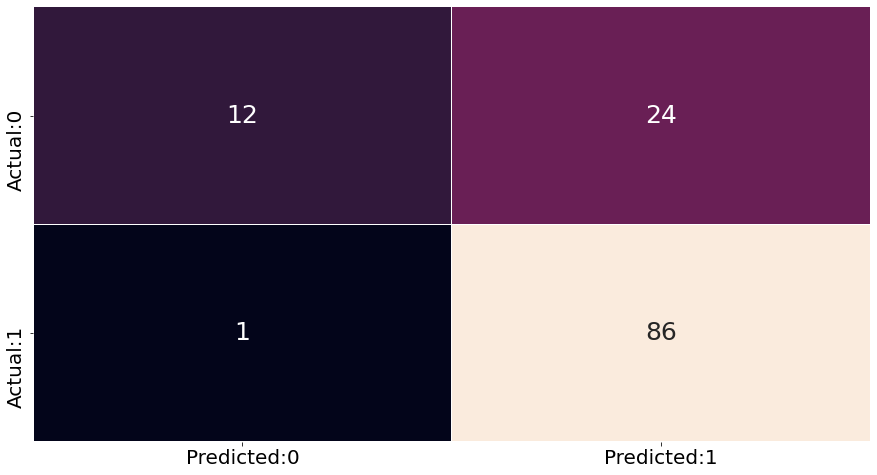

In [41]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

In [42]:
acc_table = classification_report(y_test, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.92      0.33      0.49        36
           1       0.78      0.99      0.87        87

    accuracy                           0.80       123
   macro avg       0.85      0.66      0.68       123
weighted avg       0.82      0.80      0.76       123



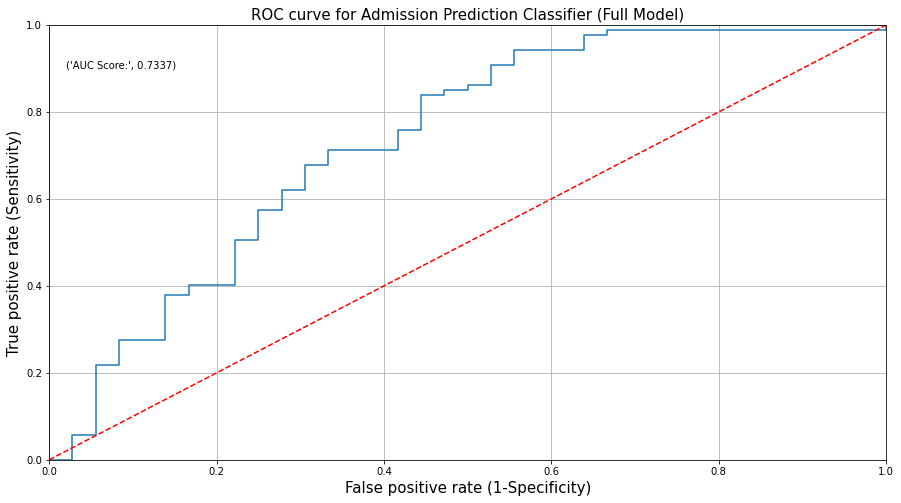

In [43]:
# AUC for Logistic Regression

# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

In [44]:
update_score_card('Logistic Regression without smote',logreg, X_test, y_test)

,Model Name,Accuracy Score,AUC Score,Precision Score,Recall Score,Kappa Score,f1-score,F1-score
0,Logistic Regression without smote,0.796748,0.733716,0.781818,0.988506,0.395993,nan,0.873096


# Logistic Regression with SMOTE

In [45]:
from imblearn.over_sampling import SMOTE 
smt = SMOTE(random_state=42)
X_sm, Y_sm = smt.fit_resample(X, Y)
Y_sm.value_counts()

1    422
0    422
Name: Labelled_Loan_Status, dtype: int64

In [46]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sm, Y_sm, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train1.shape)
print('y_train', y_train1.shape)

# print dimension of test set
print('X_test', X_test1.shape)
print('y_test', y_test1.shape)

X_train (675, 12)
y_train (675,)
X_test (169, 12)
y_test (169,)


In [47]:
logregs = sm.Logit(y_train1, X_train1).fit()
print(logregs.summary())

Optimization terminated successfully.
         Current function value: 0.472922
         Iterations 8
                            Logit Regression Results                            
Dep. Variable:     Labelled_Loan_Status   No. Observations:                  675
Model:                            Logit   Df Residuals:                      663
Method:                             MLE   Df Model:                           11
Date:                  Sun, 04 Apr 2021   Pseudo R-squ.:                  0.3174
Time:                          23:47:20   Log-Likelihood:                -319.22
converged:                         True   LL-Null:                       -467.66
Covariance Type:              nonrobust   LLR p-value:                 3.987e-57
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -5.4795      0.805     -6.809      0.000  

In [48]:
y_pred_prob1 = logregs.predict(X_test1)
y_pred_prob1.head()

740   0.023227
649   0.627245
479   0.864816
826   0.325069
351   0.340543
dtype: float64

In [49]:
y_pred1 = [ 0 if x < 0.5 else 1 for x in y_pred_prob1]
y_pred1[0:5]

[0, 1, 1, 0, 0]

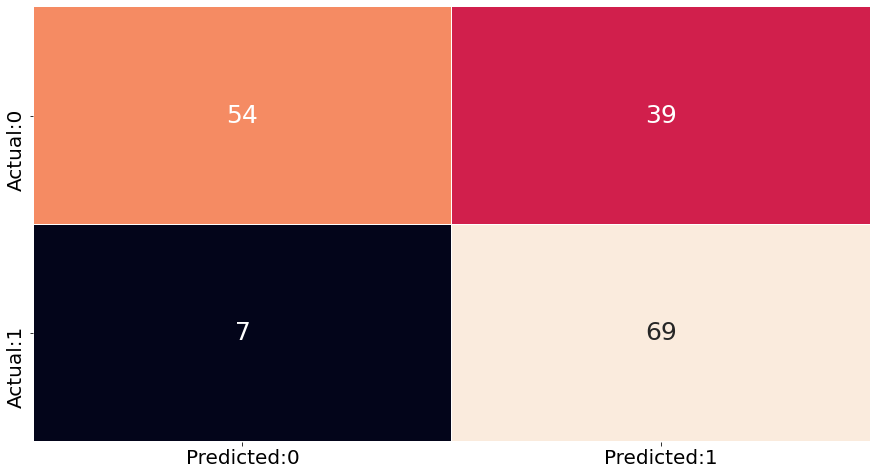

In [50]:
# Confusion Matrix
cm = confusion_matrix(y_test1, y_pred1)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

In [51]:
acc_table = classification_report(y_test1, y_pred1)
print(acc_table)

              precision    recall  f1-score   support

           0       0.89      0.58      0.70        93
           1       0.64      0.91      0.75        76

    accuracy                           0.73       169
   macro avg       0.76      0.74      0.73       169
weighted avg       0.77      0.73      0.72       169



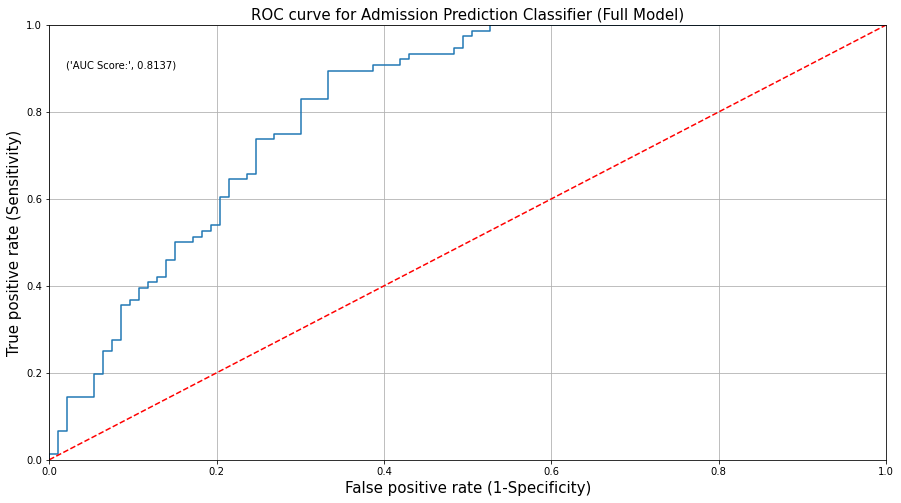

In [52]:
# AUC for Logistic Regression

# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob1)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test1, y_pred_prob1),4)))
                               
# plot the grid
plt.grid(True)

In [53]:
update_score_card('Logistic Regression with smote',logregs,X_test1,y_test1)

,Model Name,Accuracy Score,AUC Score,Precision Score,Recall Score,Kappa Score,f1-score,F1-score
0,Logistic Regression without smote,0.796748,0.733716,0.781818,0.988506,0.395993,nan,0.873096
1,Logistic Regression with smote,0.727811,0.813667,0.638889,0.907895,0.470436,nan,0.750000


# Train-Test Split

In [54]:
X.drop('const',1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (491, 11)
y_train (491,)
X_test (123, 11)
y_test (123,)


# Handling imbalanced data using SMOTE

In [55]:
from imblearn.over_sampling import SMOTE 
smt = SMOTE(random_state = 42)
X_sm, Y_sm = smt.fit_resample(X, Y)
Y_sm.value_counts()

1    422
0    422
Name: Labelled_Loan_Status, dtype: int64

In [56]:
X_trains, X_tests, y_trains, y_tests = train_test_split(X_sm, Y_sm, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_trains.shape)
print('y_train', y_trains.shape)

# print dimension of test set
print('X_test', X_tests.shape)
print('y_test', y_tests.shape)

X_train (675, 11)
y_train (675,)
X_test (169, 11)
y_test (169,)


# Naive bayes

In [57]:
# instantiate the 'GaussianNB'
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model = gnb.fit(X_train, y_train)
y_pred=gnb_model.predict(X_test)

In [58]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[13, 23],
       [ 4, 83]], dtype=int64)

In [59]:
test_report = get_test_report(gnb_model, X_test, y_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.76      0.36      0.49        36
           1       0.78      0.95      0.86        87

    accuracy                           0.78       123
   macro avg       0.77      0.66      0.68       123
weighted avg       0.78      0.78      0.75       123



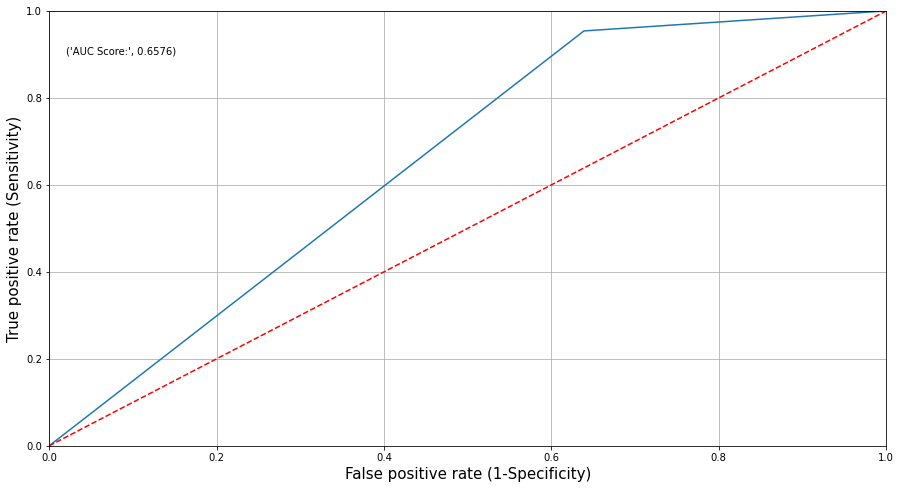

In [60]:
plot_roc(gnb_model, X_test, y_test)

In [61]:
update_score_card('Naive Bayes',gnb_model,X_test,y_test)

,Model Name,Accuracy Score,AUC Score,Precision Score,Recall Score,Kappa Score,f1-score,F1-score
0,Logistic Regression without smote,0.796748,0.733716,0.781818,0.988506,0.395993,nan,0.873096
1,Logistic Regression with smote,0.727811,0.813667,0.638889,0.907895,0.470436,nan,0.750000
2,Naive Bayes,0.780488,0.657567,0.783019,0.954023,0.372805,nan,0.860104


# Naive Bayes after SMOTE

In [62]:
# instantiate the 'GaussianNB'
gnb = GaussianNB()

# fit the model using fit() on train data
gnb_model1 = gnb.fit(X_trains, y_trains)
y_pred1 = gnb_model.predict(X_tests)


In [63]:
cm=confusion_matrix(y_test1,y_pred1)
cm

array([[38, 55],
       [ 5, 71]], dtype=int64)

In [64]:
test_report = get_test_report(gnb_model1,X_tests, y_tests)
print(test_report)

              precision    recall  f1-score   support

           0       0.94      0.54      0.68        93
           1       0.63      0.96      0.76        76

    accuracy                           0.73       169
   macro avg       0.79      0.75      0.72       169
weighted avg       0.80      0.73      0.72       169



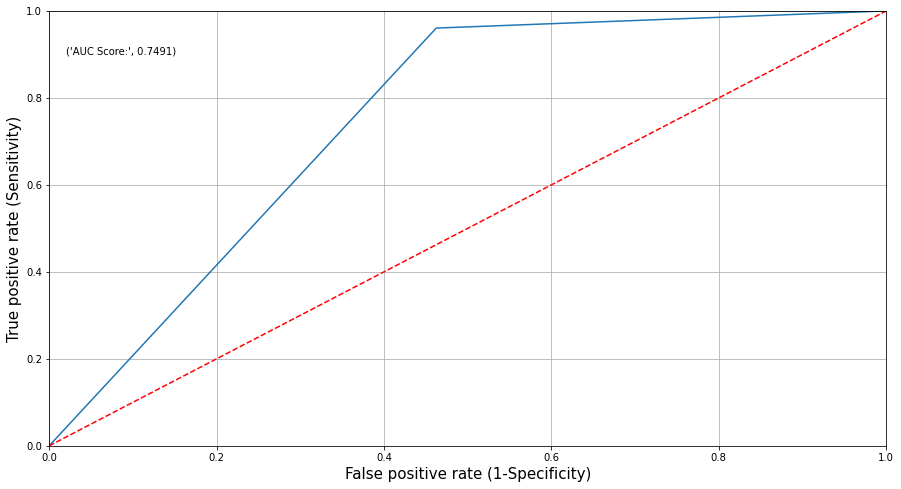

In [65]:
plot_roc(gnb_model1, X_tests, y_tests)

In [66]:
update_score_card('Naive Bayes after SMOTE',gnb_model1,X_tests, y_tests)

,Model Name,Accuracy Score,AUC Score,Precision Score,Recall Score,Kappa Score,f1-score,F1-score
0,Logistic Regression without smote,0.796748,0.733716,0.781818,0.988506,0.395993,nan,0.873096
1,Logistic Regression with smote,0.727811,0.813667,0.638889,0.907895,0.470436,nan,0.750000
2,Naive Bayes,0.780488,0.657567,0.783019,0.954023,0.372805,nan,0.860104
3,Naive Bayes after SMOTE,0.727811,0.749080,0.629310,0.960526,0.475297,nan,0.760417


# K- Nearest Neighbor

In [67]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['euclidean','manhattan','Chebyshev']}

knn_classification = KNeighborsClassifier()

knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 10, 
                        scoring = 'accuracy')

knn_grid.fit(X_train, y_train)

print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'hamming', 'n_neighbors': 13} 



In [68]:
knn_classification = KNeighborsClassifier(n_neighbors = 13, metric=knn_grid.best_params_['metric'])

knn_model1 = knn_classification.fit(X_train, y_train)

In [69]:
test_report = get_test_report(knn_model1, X_test, y_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.62      0.22      0.33        36
           1       0.75      0.94      0.83        87

    accuracy                           0.73       123
   macro avg       0.68      0.58      0.58       123
weighted avg       0.71      0.73      0.68       123



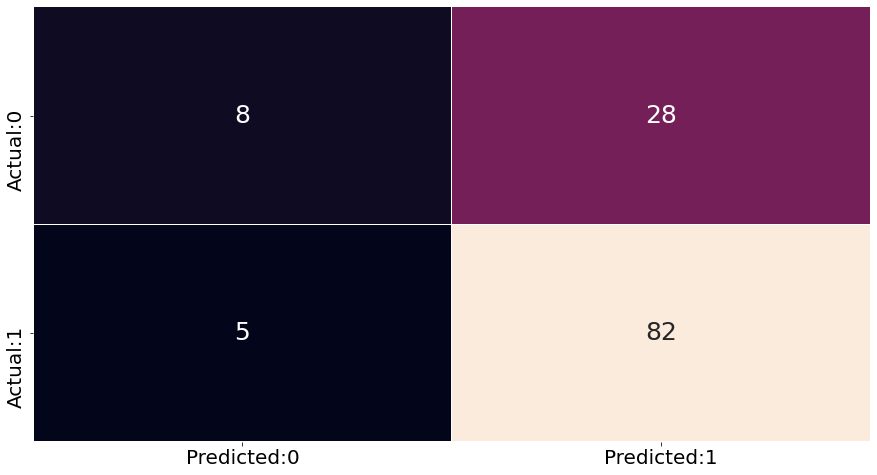

In [70]:
plot_confusion_matrix(knn_model1, X_test, y_test)

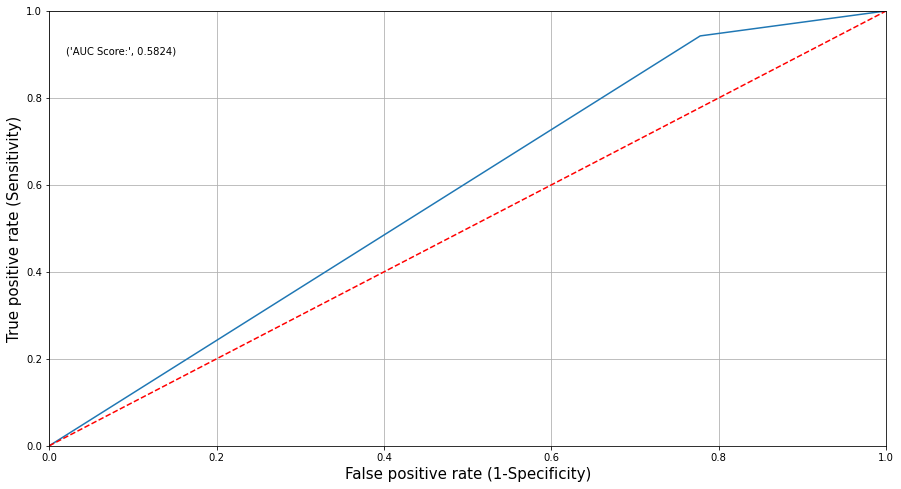

In [71]:
plot_roc(knn_model1, X_test, y_test)

In [72]:
update_score_card('KNN',knn_model1, X_test, y_test)

,Model Name,Accuracy Score,AUC Score,Precision Score,Recall Score,Kappa Score,f1-score,F1-score
0,Logistic Regression without smote,0.796748,0.733716,0.781818,0.988506,0.395993,nan,0.873096
1,Logistic Regression with smote,0.727811,0.813667,0.638889,0.907895,0.470436,nan,0.750000
2,Naive Bayes,0.780488,0.657567,0.783019,0.954023,0.372805,nan,0.860104
3,Naive Bayes after SMOTE,0.727811,0.749080,0.629310,0.960526,0.475297,nan,0.760417
4,KNN,0.731707,0.582375,0.745455,0.942529,0.202711,nan,0.832487


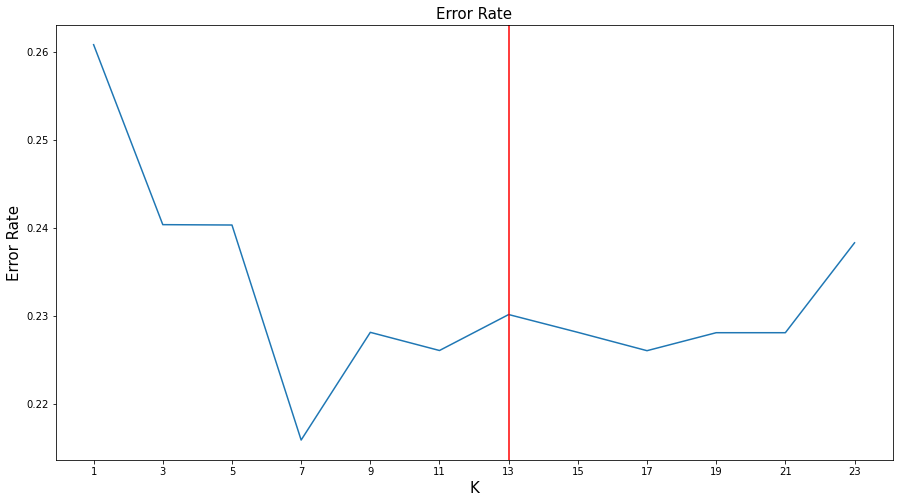

In [73]:
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,25,2):
 
    knn = KNeighborsClassifier(i, metric = 'hamming')

    score = cross_val_score(knn, X_train, y_train, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,25,2), error_rate)

plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 25, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 13, color = 'red')

# display the plot
plt.show()

We can see that the optimal value of K (= 13) obtained from the GridSearchCV() results in a lowest error rate.

# Using SMOTE Analysis for KNN

In [74]:
knn_classification = KNeighborsClassifier(n_neighbors = knn_grid.best_params_['n_neighbors'], metric=knn_grid.best_params_['metric'])
knn_model2 = knn_classification.fit(X_trains, y_trains)

In [75]:
test_report = get_test_report(knn_model2, X_tests, y_tests)
print(test_report)

              precision    recall  f1-score   support

           0       0.92      0.47      0.62        93
           1       0.60      0.95      0.73        76

    accuracy                           0.69       169
   macro avg       0.76      0.71      0.68       169
weighted avg       0.77      0.69      0.67       169



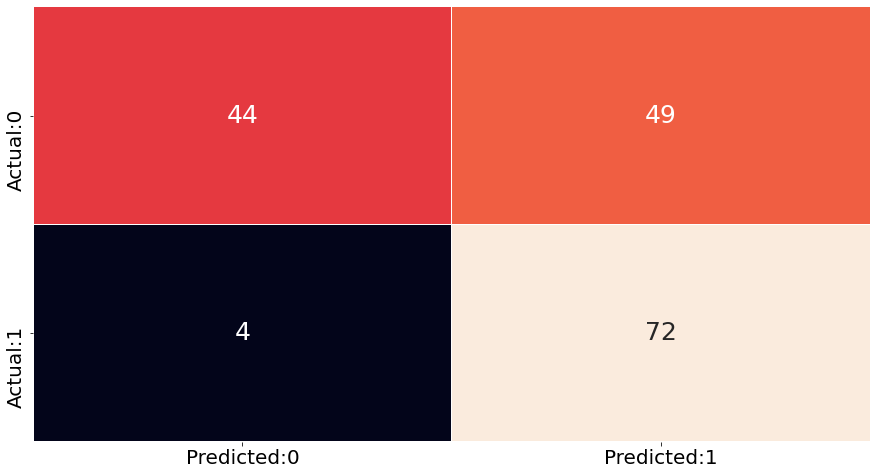

In [76]:
plot_confusion_matrix(knn_model2, X_tests, y_tests)

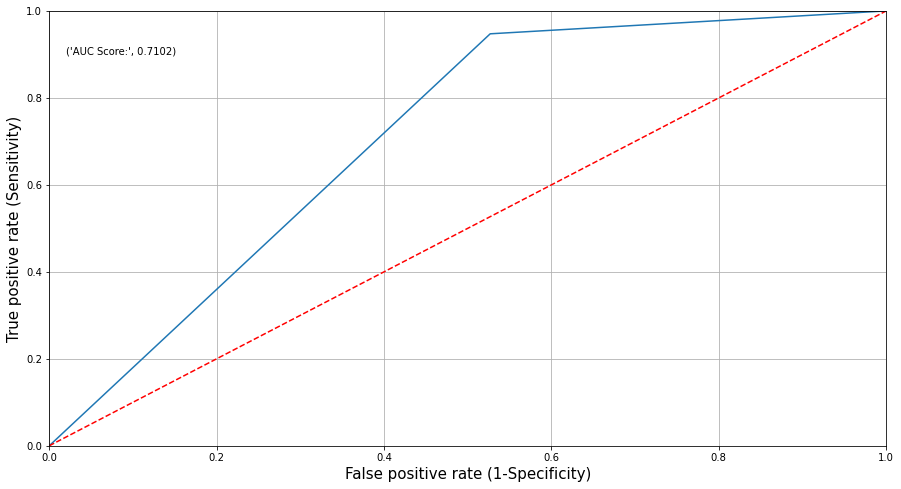

In [77]:
plot_roc(knn_model2, X_tests, y_tests)

In [78]:
update_score_card('KNN after SMOTE',knn_model2, X_tests, y_tests)

,Model Name,Accuracy Score,AUC Score,Precision Score,Recall Score,Kappa Score,f1-score,F1-score
0,Logistic Regression without smote,0.796748,0.733716,0.781818,0.988506,0.395993,nan,0.873096
1,Logistic Regression with smote,0.727811,0.813667,0.638889,0.907895,0.470436,nan,0.750000
2,Naive Bayes,0.780488,0.657567,0.783019,0.954023,0.372805,nan,0.860104
3,Naive Bayes after SMOTE,0.727811,0.749080,0.629310,0.960526,0.475297,nan,0.760417
4,KNN,0.731707,0.582375,0.745455,0.942529,0.202711,nan,0.832487
5,KNN after SMOTE,0.686391,0.710243,0.595041,0.947368,0.398899,nan,0.730964


# Decision Tree

In [79]:
# Tuning using Grid Search
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2,5),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,5),
                     'min_samples_leaf': range(1,5),
                     'max_leaf_nodes': range(1,3)}]

decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [80]:
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

dt_model = dt_model.fit(X_train, y_train)

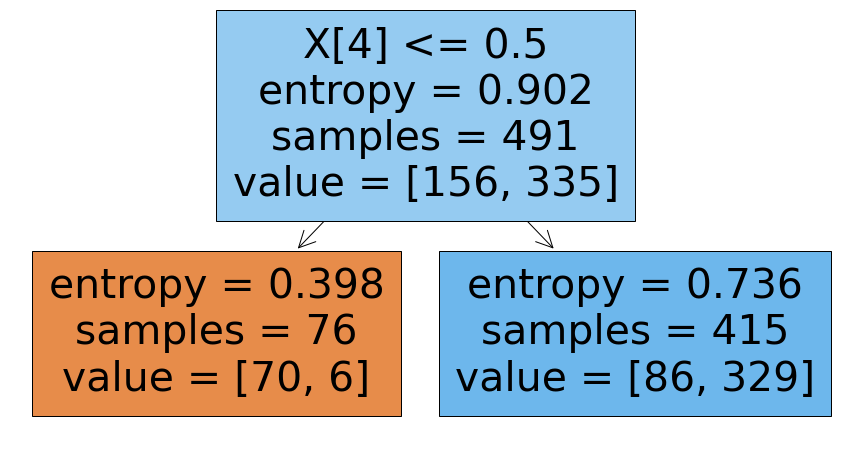

In [81]:
from sklearn import tree
tree.plot_tree(dt_model,filled=True)
plt.show()

In [82]:
train_reportd = get_train_report(dt_model, X_train, y_train)
print(train_reportd)

              precision    recall  f1-score   support

           0       0.92      0.45      0.60       156
           1       0.79      0.98      0.88       335

    accuracy                           0.81       491
   macro avg       0.86      0.72      0.74       491
weighted avg       0.83      0.81      0.79       491



In [83]:
test_reportd = get_test_report(dt_model, X_test, y_test)
print(test_reportd)

              precision    recall  f1-score   support

           0       0.92      0.33      0.49        36
           1       0.78      0.99      0.87        87

    accuracy                           0.80       123
   macro avg       0.85      0.66      0.68       123
weighted avg       0.82      0.80      0.76       123



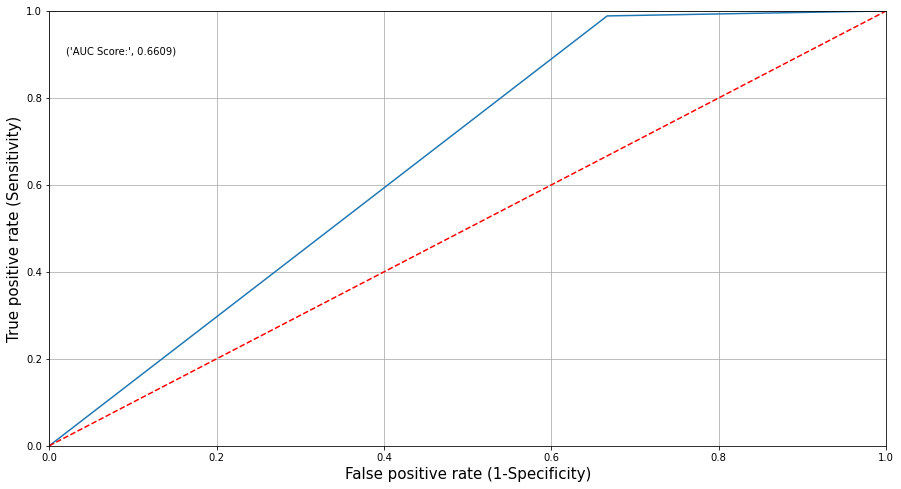

In [84]:
plot_roc(dt_model, X_test, y_test)

In [85]:
update_score_card('Decision Tree',dt_model, X_test, y_test)

,Model Name,Accuracy Score,AUC Score,Precision Score,Recall Score,Kappa Score,f1-score,F1-score
0,Logistic Regression without smote,0.796748,0.733716,0.781818,0.988506,0.395993,nan,0.873096
1,Logistic Regression with smote,0.727811,0.813667,0.638889,0.907895,0.470436,nan,0.750000
2,Naive Bayes,0.780488,0.657567,0.783019,0.954023,0.372805,nan,0.860104
3,Naive Bayes after SMOTE,0.727811,0.749080,0.629310,0.960526,0.475297,nan,0.760417
4,KNN,0.731707,0.582375,0.745455,0.942529,0.202711,nan,0.832487
5,KNN after SMOTE,0.686391,0.710243,0.595041,0.947368,0.398899,nan,0.730964
6,Decision Tree,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096


# Using SMOTE Analysis for Decision Tree

In [86]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2,5),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,5),
                     'min_samples_leaf': range(1,5),
                     'max_leaf_nodes': range(1,3)}]

decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(X_trains, y_trains)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [87]:
dt_model1 = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

dt_model1 = dt_model1.fit(X_trains, y_trains)

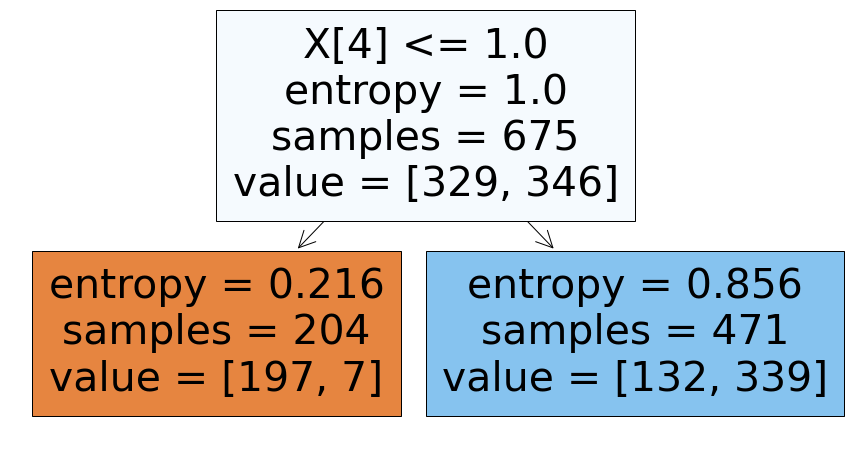

In [88]:
from sklearn import tree
tree.plot_tree(dt_model1,filled=True)
plt.show()

In [89]:
train_reports = get_train_report(dt_model1, X_trains, y_trains)
print(train_reports)

              precision    recall  f1-score   support

           0       0.97      0.60      0.74       329
           1       0.72      0.98      0.83       346

    accuracy                           0.79       675
   macro avg       0.84      0.79      0.78       675
weighted avg       0.84      0.79      0.79       675



In [90]:
test_reports = get_test_report(dt_model1, X_tests, y_tests)
print(test_reports)

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        93
           1       0.61      1.00      0.76        76

    accuracy                           0.71       169
   macro avg       0.80      0.74      0.70       169
weighted avg       0.82      0.71      0.69       169



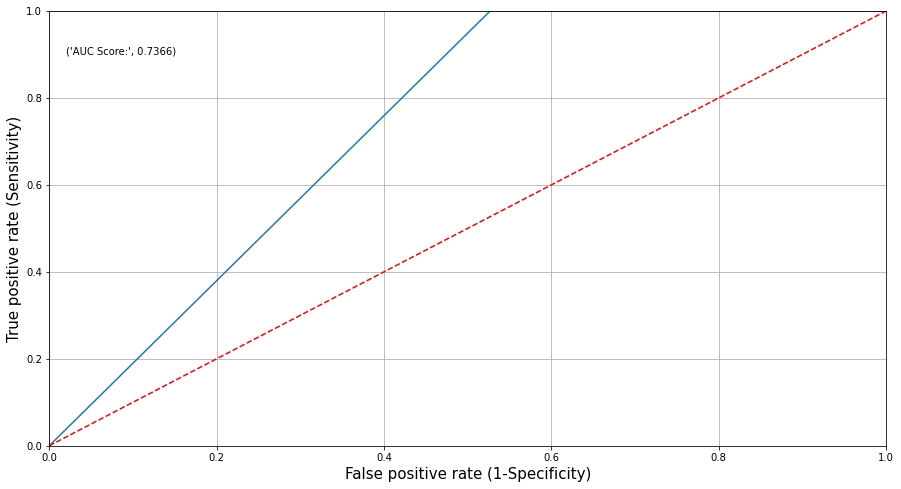

In [91]:
plot_roc(dt_model1, X_tests, y_tests)

In [92]:
update_score_card('Decision tree after SMOTE',dt_model1, X_tests, y_tests)

,Model Name,Accuracy Score,AUC Score,Precision Score,Recall Score,Kappa Score,f1-score,F1-score
0,Logistic Regression without smote,0.796748,0.733716,0.781818,0.988506,0.395993,nan,0.873096
1,Logistic Regression with smote,0.727811,0.813667,0.638889,0.907895,0.470436,nan,0.750000
2,Naive Bayes,0.780488,0.657567,0.783019,0.954023,0.372805,nan,0.860104
3,Naive Bayes after SMOTE,0.727811,0.749080,0.629310,0.960526,0.475297,nan,0.760417
4,KNN,0.731707,0.582375,0.745455,0.942529,0.202711,nan,0.832487
5,KNN after SMOTE,0.686391,0.710243,0.595041,0.947368,0.398899,nan,0.730964
6,Decision Tree,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
7,Decision tree after SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219


# Random Forest

In [93]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10],
                     'max_depth': [3],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5],
                     'min_samples_leaf': [1, 3],
                     'max_leaf_nodes': [2, 5]}]
 
random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 10} 



In [94]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

rf_model = rf_model.fit(X_train, y_train)

In [95]:
train_report = get_train_report(rf_model, X_train, y_train)
print(train_report) 

              precision    recall  f1-score   support

           0       0.92      0.45      0.60       156
           1       0.79      0.98      0.88       335

    accuracy                           0.81       491
   macro avg       0.86      0.72      0.74       491
weighted avg       0.83      0.81      0.79       491



In [96]:
test_report = get_test_report(rf_model, X_test, y_test)
print(test_report) 

              precision    recall  f1-score   support

           0       0.92      0.33      0.49        36
           1       0.78      0.99      0.87        87

    accuracy                           0.80       123
   macro avg       0.85      0.66      0.68       123
weighted avg       0.82      0.80      0.76       123



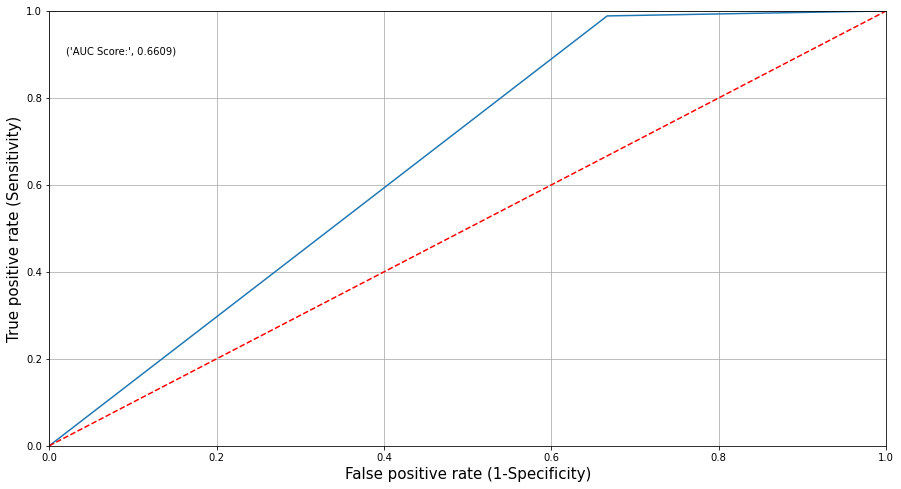

In [97]:
plot_roc(rf_model, X_test, y_test)

In [98]:
update_score_card('Random Forest',rf_model, X_test, y_test)

,Model Name,Accuracy Score,AUC Score,Precision Score,Recall Score,Kappa Score,f1-score,F1-score
0,Logistic Regression without smote,0.796748,0.733716,0.781818,0.988506,0.395993,nan,0.873096
1,Logistic Regression with smote,0.727811,0.813667,0.638889,0.907895,0.470436,nan,0.750000
2,Naive Bayes,0.780488,0.657567,0.783019,0.954023,0.372805,nan,0.860104
3,Naive Bayes after SMOTE,0.727811,0.749080,0.629310,0.960526,0.475297,nan,0.760417
4,KNN,0.731707,0.582375,0.745455,0.942529,0.202711,nan,0.832487
5,KNN after SMOTE,0.686391,0.710243,0.595041,0.947368,0.398899,nan,0.730964
6,Decision Tree,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
7,Decision tree after SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219
8,Random Forest,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096


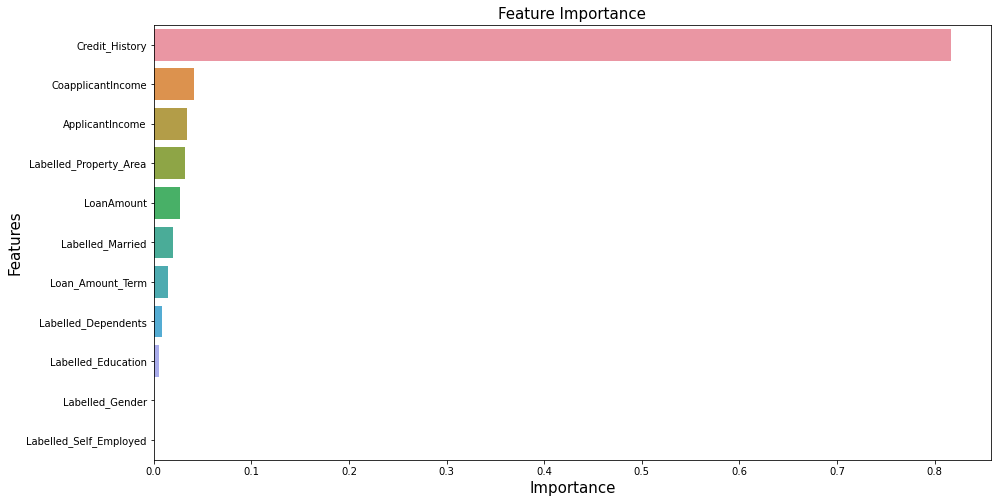

In [99]:
# Identifying important Features
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

# Using SMOTE Analysis for Random Forest

In [100]:
rf_model1 = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

rf_model1 = rf_model1.fit(X_trains, y_trains)

In [101]:
train_report = get_train_report(rf_model1,X_trains, y_trains)
print(train_report) 

              precision    recall  f1-score   support

           0       0.97      0.60      0.74       329
           1       0.72      0.98      0.83       346

    accuracy                           0.79       675
   macro avg       0.84      0.79      0.78       675
weighted avg       0.84      0.79      0.79       675



In [102]:
test_report = get_test_report(rf_model1, X_tests, y_tests)
print(test_report) 

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        93
           1       0.61      1.00      0.76        76

    accuracy                           0.71       169
   macro avg       0.80      0.74      0.70       169
weighted avg       0.82      0.71      0.69       169



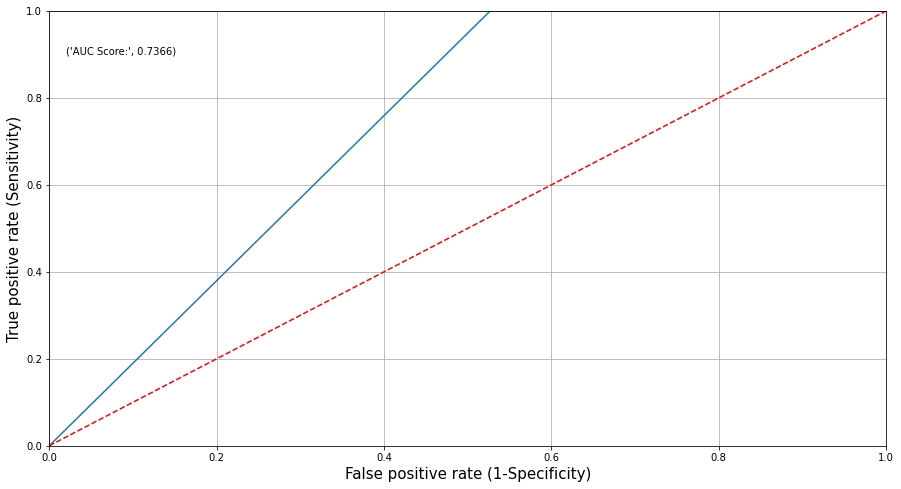

In [103]:
plot_roc(rf_model1, X_tests, y_tests)

In [104]:
update_score_card('Random Forest with SMOTE',rf_model1, X_tests, y_tests)

,Model Name,Accuracy Score,AUC Score,Precision Score,Recall Score,Kappa Score,f1-score,F1-score
0,Logistic Regression without smote,0.796748,0.733716,0.781818,0.988506,0.395993,nan,0.873096
1,Logistic Regression with smote,0.727811,0.813667,0.638889,0.907895,0.470436,nan,0.750000
2,Naive Bayes,0.780488,0.657567,0.783019,0.954023,0.372805,nan,0.860104
3,Naive Bayes after SMOTE,0.727811,0.749080,0.629310,0.960526,0.475297,nan,0.760417
4,KNN,0.731707,0.582375,0.745455,0.942529,0.202711,nan,0.832487
5,KNN after SMOTE,0.686391,0.710243,0.595041,0.947368,0.398899,nan,0.730964
6,Decision Tree,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
7,Decision tree after SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219
8,Random Forest,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
9,Random Forest with SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219


# Boosting

# Ada Boost

In [105]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [106]:
test_report = get_test_report(ada_model, X_test, y_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.78      0.39      0.52        36
           1       0.79      0.95      0.86        87

    accuracy                           0.79       123
   macro avg       0.78      0.67      0.69       123
weighted avg       0.79      0.79      0.76       123



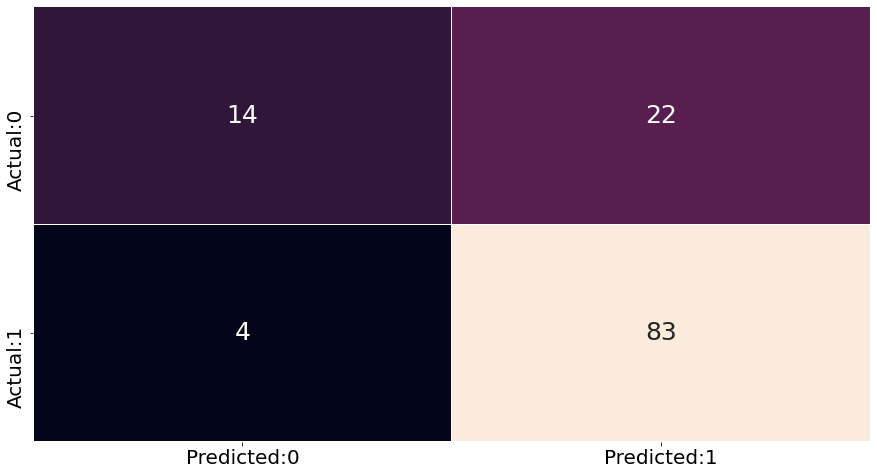

In [107]:
plot_confusion_matrix(ada_model, X_test, y_test)

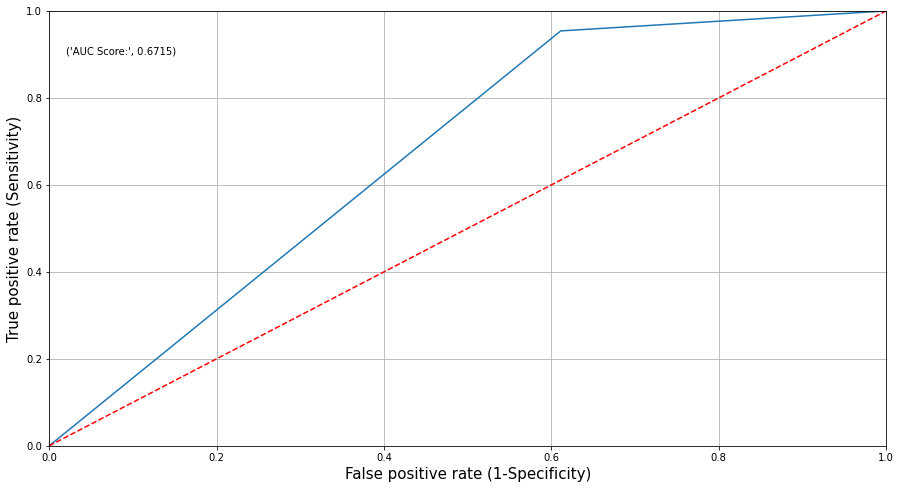

In [108]:
plot_roc(ada_model, X_test, y_test)

In [109]:
update_score_card('ADA-BOOST',ada_model, X_test, y_test)

,Model Name,Accuracy Score,AUC Score,Precision Score,Recall Score,Kappa Score,f1-score,F1-score
0,Logistic Regression without smote,0.796748,0.733716,0.781818,0.988506,0.395993,nan,0.873096
1,Logistic Regression with smote,0.727811,0.813667,0.638889,0.907895,0.470436,nan,0.750000
2,Naive Bayes,0.780488,0.657567,0.783019,0.954023,0.372805,nan,0.860104
3,Naive Bayes after SMOTE,0.727811,0.749080,0.629310,0.960526,0.475297,nan,0.760417
4,KNN,0.731707,0.582375,0.745455,0.942529,0.202711,nan,0.832487
5,KNN after SMOTE,0.686391,0.710243,0.595041,0.947368,0.398899,nan,0.730964
6,Decision Tree,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
7,Decision tree after SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219
8,Random Forest,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
9,Random Forest with SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219


# Implementing SMOTE on ADA-BOOST

In [110]:
ada_model1 = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model1.fit(X_trains, y_trains)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [111]:
test_report = get_test_report(ada_model1, X_tests, y_tests)
print(test_report)

              precision    recall  f1-score   support

           0       0.90      0.65      0.75        93
           1       0.68      0.91      0.78        76

    accuracy                           0.76       169
   macro avg       0.79      0.78      0.76       169
weighted avg       0.80      0.76      0.76       169



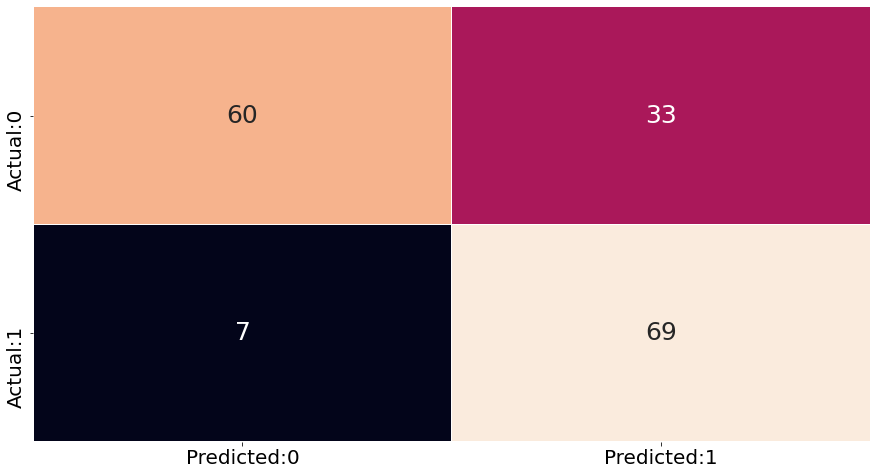

In [112]:
plot_confusion_matrix(ada_model1, X_tests, y_tests)

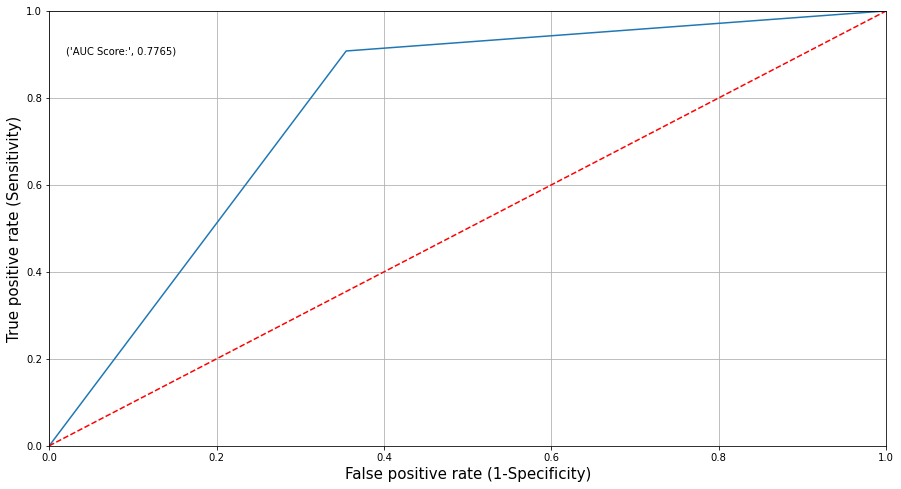

In [113]:
plot_roc(ada_model1, X_tests, y_tests)

In [114]:
update_score_card('ADA-BOOST with SMOTE',ada_model1, X_tests, y_tests)

,Model Name,Accuracy Score,AUC Score,Precision Score,Recall Score,Kappa Score,f1-score,F1-score
0,Logistic Regression without smote,0.796748,0.733716,0.781818,0.988506,0.395993,nan,0.873096
1,Logistic Regression with smote,0.727811,0.813667,0.638889,0.907895,0.470436,nan,0.750000
2,Naive Bayes,0.780488,0.657567,0.783019,0.954023,0.372805,nan,0.860104
3,Naive Bayes after SMOTE,0.727811,0.749080,0.629310,0.960526,0.475297,nan,0.760417
4,KNN,0.731707,0.582375,0.745455,0.942529,0.202711,nan,0.832487
5,KNN after SMOTE,0.686391,0.710243,0.595041,0.947368,0.398899,nan,0.730964
6,Decision Tree,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
7,Decision tree after SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219
8,Random Forest,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
9,Random Forest with SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219


# Gradient Boosting

In [115]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [116]:
test_report = get_test_report(gboost_model, X_test, y_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.58      0.39      0.47        36
           1       0.78      0.89      0.83        87

    accuracy                           0.74       123
   macro avg       0.68      0.64      0.65       123
weighted avg       0.72      0.74      0.72       123



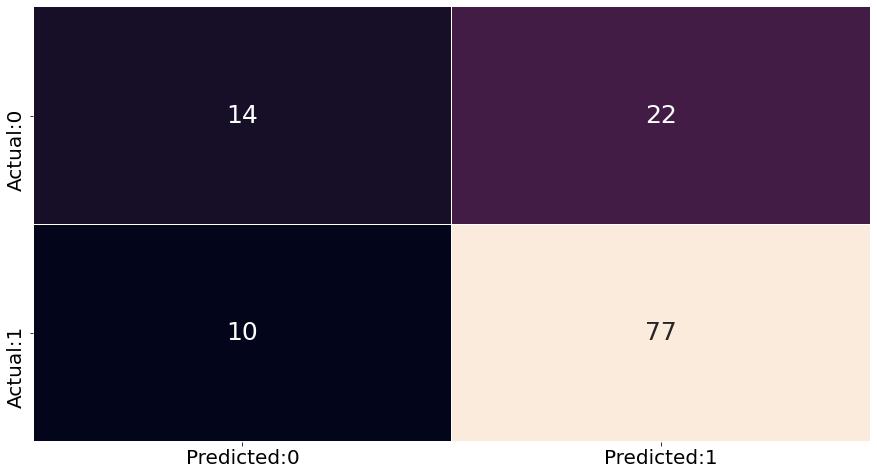

In [117]:
plot_confusion_matrix(gboost_model, X_test, y_test)

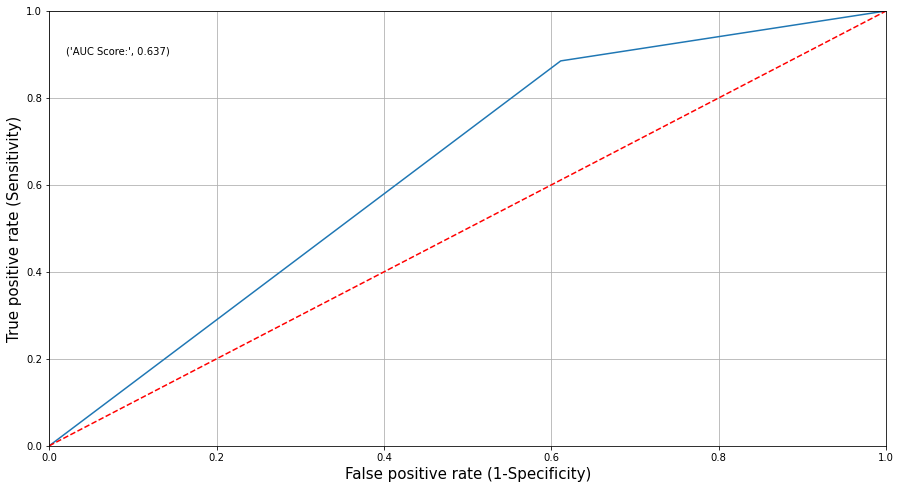

In [118]:
plot_roc(gboost_model, X_test, y_test)

In [119]:
update_score_card('Gradient Boosting',gboost_model, X_test, y_test)

,Model Name,Accuracy Score,AUC Score,Precision Score,Recall Score,Kappa Score,f1-score,F1-score
0,Logistic Regression without smote,0.796748,0.733716,0.781818,0.988506,0.395993,nan,0.873096
1,Logistic Regression with smote,0.727811,0.813667,0.638889,0.907895,0.470436,nan,0.750000
2,Naive Bayes,0.780488,0.657567,0.783019,0.954023,0.372805,nan,0.860104
3,Naive Bayes after SMOTE,0.727811,0.749080,0.629310,0.960526,0.475297,nan,0.760417
4,KNN,0.731707,0.582375,0.745455,0.942529,0.202711,nan,0.832487
5,KNN after SMOTE,0.686391,0.710243,0.595041,0.947368,0.398899,nan,0.730964
6,Decision Tree,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
7,Decision tree after SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219
8,Random Forest,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
9,Random Forest with SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219


# Implementing SMOTE on Gradient Boost

In [120]:
gboost_model1 = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
gboost_model1.fit(X_trains, y_trains)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [121]:
test_report = get_test_report(gboost_model1, X_tests, y_tests)
print(test_report)

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        93
           1       0.73      0.87      0.80        76

    accuracy                           0.80       169
   macro avg       0.80      0.81      0.80       169
weighted avg       0.81      0.80      0.80       169



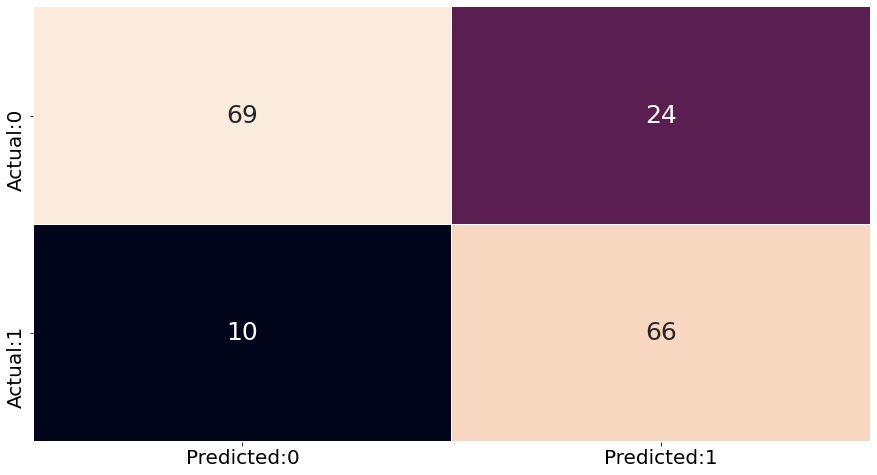

In [122]:
plot_confusion_matrix(gboost_model1, X_tests, y_tests)

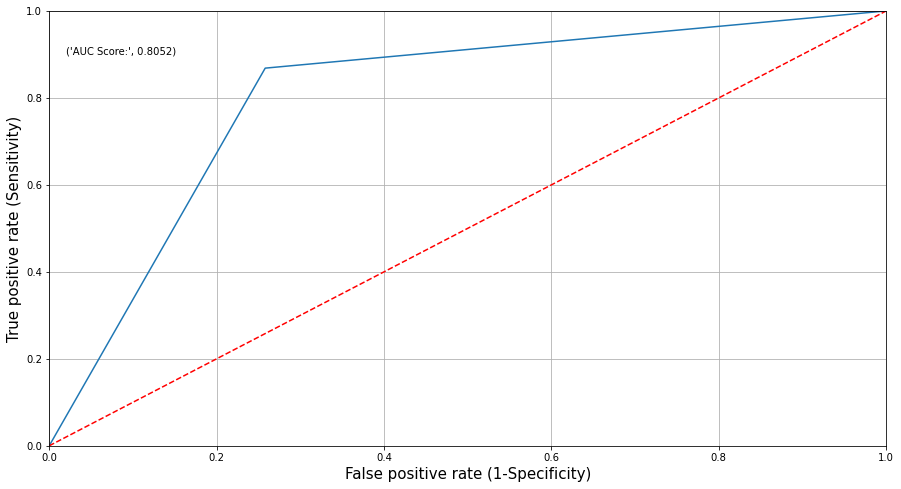

In [123]:
plot_roc(gboost_model1, X_tests, y_tests)

In [124]:
update_score_card('Gradient Boosting with SMOTE',gboost_model1, X_tests, y_tests)

,Model Name,Accuracy Score,AUC Score,Precision Score,Recall Score,Kappa Score,f1-score,F1-score
0,Logistic Regression without smote,0.796748,0.733716,0.781818,0.988506,0.395993,nan,0.873096
1,Logistic Regression with smote,0.727811,0.813667,0.638889,0.907895,0.470436,nan,0.750000
2,Naive Bayes,0.780488,0.657567,0.783019,0.954023,0.372805,nan,0.860104
3,Naive Bayes after SMOTE,0.727811,0.749080,0.629310,0.960526,0.475297,nan,0.760417
4,KNN,0.731707,0.582375,0.745455,0.942529,0.202711,nan,0.832487
5,KNN after SMOTE,0.686391,0.710243,0.595041,0.947368,0.398899,nan,0.730964
6,Decision Tree,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
7,Decision tree after SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219
8,Random Forest,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
9,Random Forest with SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219


# XGBoost

In [125]:
# Tuning Hyperparameter using GridSearch
tuning_parameters = {'learning_rate': [0.1, 0.5],
                     'max_depth': range(1,10),
                     'gamma': [0, 1, 2, 3, 4]}

xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 5, scoring = 'accuracy')
xgb_grid.fit(X_train, y_train)

print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

[23:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:48:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:48:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:48:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:48:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:48:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:48:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:48:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:48:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:49:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [126]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

xgb_model = xgb_grid_model.fit(X_train, y_train)

print('Classification Report for test set:\n', get_test_report(xgb_model, X_test, y_test))

[23:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report for test set:
               precision    recall  f1-score   support

           0       0.92      0.33      0.49        36
           1       0.78      0.99      0.87        87

    accuracy                           0.80       123
   macro avg       0.85      0.66      0.68       123
weighted avg       0.82      0.80      0.76       123



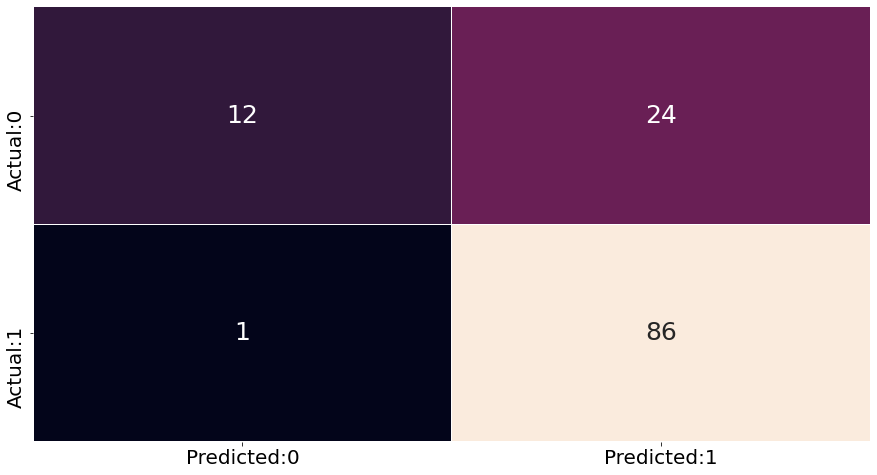

In [127]:
plot_confusion_matrix(xgb_model, X_test, y_test)

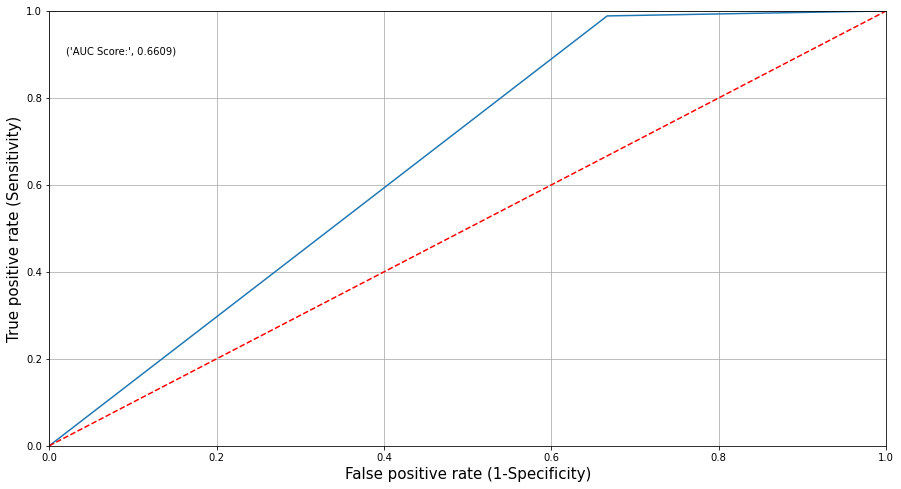

In [128]:
plot_roc(xgb_model, X_test, y_test)

In [129]:
update_score_card('XGBoost',xgb_model, X_test, y_test)

,Model Name,Accuracy Score,AUC Score,Precision Score,Recall Score,Kappa Score,f1-score,F1-score
0,Logistic Regression without smote,0.796748,0.733716,0.781818,0.988506,0.395993,nan,0.873096
1,Logistic Regression with smote,0.727811,0.813667,0.638889,0.907895,0.470436,nan,0.750000
2,Naive Bayes,0.780488,0.657567,0.783019,0.954023,0.372805,nan,0.860104
3,Naive Bayes after SMOTE,0.727811,0.749080,0.629310,0.960526,0.475297,nan,0.760417
4,KNN,0.731707,0.582375,0.745455,0.942529,0.202711,nan,0.832487
5,KNN after SMOTE,0.686391,0.710243,0.595041,0.947368,0.398899,nan,0.730964
6,Decision Tree,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
7,Decision tree after SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219
8,Random Forest,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
9,Random Forest with SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219


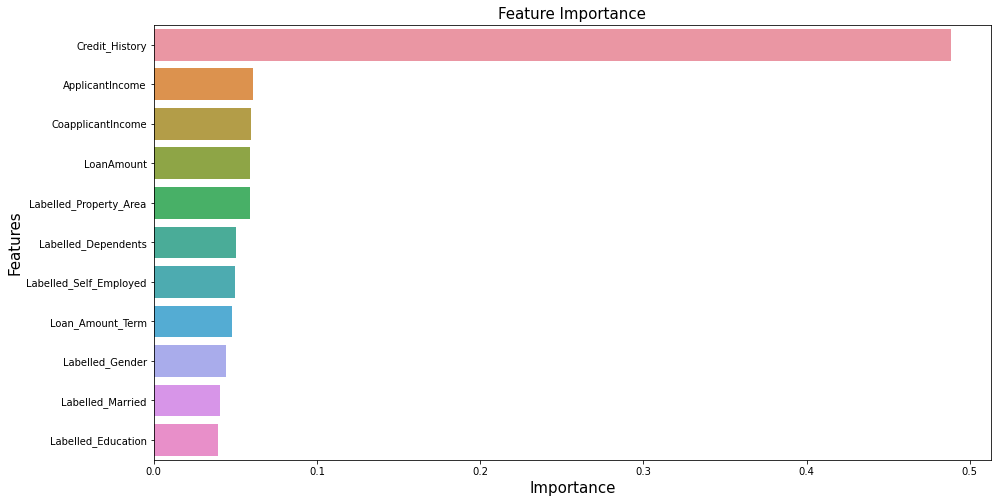

In [130]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

# Implementing SMOTE on XGBoost

In [131]:
# Tuning Hyperparameter using GridSearch
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.5, 0.6, 0.7, 0.8],
                     'max_depth': range(1,10),
                     'gamma': [0, 1, 2, 3, 4]}

xgb_model = XGBClassifier(eval_metric='error')

xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 5, scoring = 'roc_auc')
xgb_grid.fit(X_trains, y_trains)

print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 1, 'learning_rate': 0.2, 'max_depth': 9} 



In [132]:
xgb_grid_model = XGBClassifier(max_depth = 9, gamma = 1, learning_rate = 0.2, eval_metric='error')
xgb_model1 = xgb_grid_model.fit(X_trains, y_trains)

print('Classification Report for test set:\n', get_test_report(xgb_model1, X_tests, y_tests))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.86      0.69      0.77        93
           1       0.69      0.87      0.77        76

    accuracy                           0.77       169
   macro avg       0.78      0.78      0.77       169
weighted avg       0.79      0.77      0.77       169



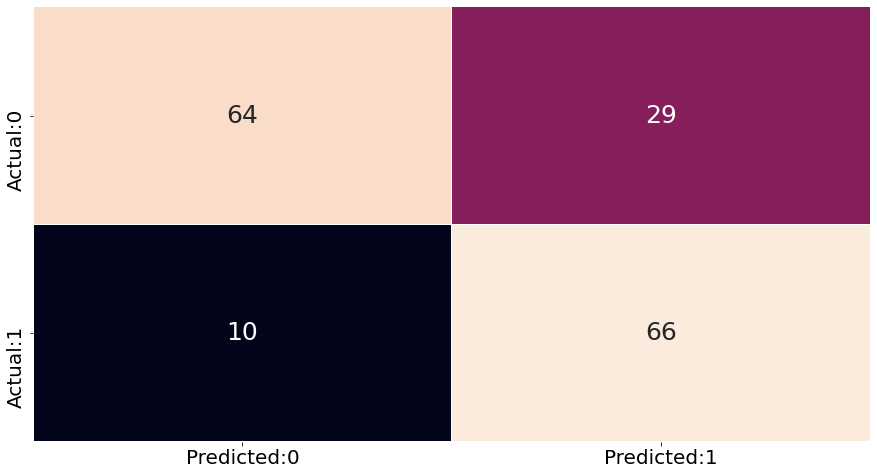

In [133]:
plot_confusion_matrix(xgb_model1, X_tests, y_tests)

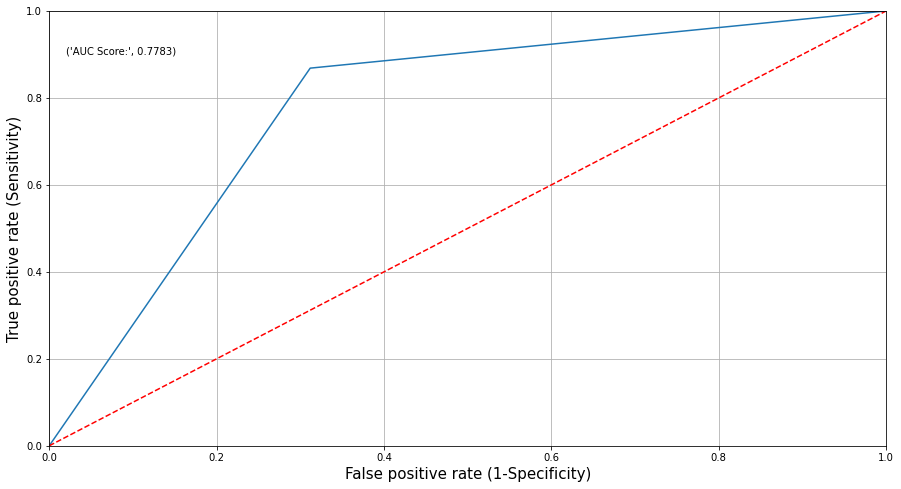

In [134]:
plot_roc(xgb_model1, X_tests, y_tests)

In [135]:
update_score_card('XGBoost with SMOTE',xgb_model1, X_tests, y_tests)

,Model Name,Accuracy Score,AUC Score,Precision Score,Recall Score,Kappa Score,f1-score,F1-score
0,Logistic Regression without smote,0.796748,0.733716,0.781818,0.988506,0.395993,nan,0.873096
1,Logistic Regression with smote,0.727811,0.813667,0.638889,0.907895,0.470436,nan,0.750000
2,Naive Bayes,0.780488,0.657567,0.783019,0.954023,0.372805,nan,0.860104
3,Naive Bayes after SMOTE,0.727811,0.749080,0.629310,0.960526,0.475297,nan,0.760417
4,KNN,0.731707,0.582375,0.745455,0.942529,0.202711,nan,0.832487
5,KNN after SMOTE,0.686391,0.710243,0.595041,0.947368,0.398899,nan,0.730964
6,Decision Tree,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
7,Decision tree after SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219
8,Random Forest,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
9,Random Forest with SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219


# Stacking

In [137]:
# consider the various algorithms as base learners
base_learners = [('rf_model', RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)),
                 
                 ('Decision Tree', DecisionTreeClassifier()),
                 ('NB_model', GaussianNB())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = RandomForestClassifier())

# fit the model on train dataset
stack_model.fit(X_trains, y_trains)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=3,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=5,
                                                       min_samples_leaf=3,
                                                       n_estimators=10,
                                                       random_state=10)),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('NB_model', GaussianNB())],
                   final_estimator=RandomForestClassifier())

In [138]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
test_report = get_test_report(stack_model, X_tests, y_tests)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.83      0.62      0.71        93
           1       0.65      0.84      0.73        76

    accuracy                           0.72       169
   macro avg       0.74      0.73      0.72       169
weighted avg       0.75      0.72      0.72       169



In [143]:
update_score_card('stack/rf_model/Decision Tree/NB_model',stack_model, X_tests, y_tests)

,Model Name,Accuracy Score,AUC Score,Precision Score,Recall Score,Kappa Score,f1-score,F1-score
0,Logistic Regression without smote,0.796748,0.733716,0.781818,0.988506,0.395993,nan,0.873096
1,Logistic Regression with smote,0.727811,0.813667,0.638889,0.907895,0.470436,nan,0.750000
2,Naive Bayes,0.780488,0.657567,0.783019,0.954023,0.372805,nan,0.860104
3,Naive Bayes after SMOTE,0.727811,0.749080,0.629310,0.960526,0.475297,nan,0.760417
4,KNN,0.731707,0.582375,0.745455,0.942529,0.202711,nan,0.832487
5,KNN after SMOTE,0.686391,0.710243,0.595041,0.947368,0.398899,nan,0.730964
6,Decision Tree,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
7,Decision tree after SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219
8,Random Forest,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
9,Random Forest with SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219


In [144]:
# consider the various algorithms as base learners
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('Decision Tree', DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)),
                 ('NB_model', GaussianNB())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=10)),
                               ('Decision Tree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=2,
                                                       max_leaf_nodes=2,
                                                       random_state=10)),
                               ('NB_model', GaussianNB())],
                   final_estimator=Gaussi

In [145]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
test_report = get_test_report(stack_model, X_test, y_test)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.80      0.33      0.47        36
           1       0.78      0.97      0.86        87

    accuracy                           0.78       123
   macro avg       0.79      0.65      0.67       123
weighted avg       0.78      0.78      0.75       123



In [146]:
# consider the various algorithms as base learners
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('Decision Tree', DecisionTreeClassifier()),
                 ('NB_model', GaussianNB())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())

# fit the model on train dataset
stack_model.fit(X_trains, y_trains)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=10)),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('NB_model', GaussianNB())],
                   final_estimator=GaussianNB())

In [147]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
test_report = get_test_report(stack_model, X_tests, y_tests)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.95      0.63      0.76        93
           1       0.68      0.96      0.80        76

    accuracy                           0.78       169
   macro avg       0.82      0.80      0.78       169
weighted avg       0.83      0.78      0.78       169



In [141]:
base_learners = [('rf_model', RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)),
                 ('Decision Tree', DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)),
                 ('XGB Model', XGBClassifier(learning_rate = 0.7,
                               max_depth = 10,
                              gamma = 1)),
                ('Ada Boost',AdaBoostClassifier(n_estimators = 40, random_state = 10))]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = XGBClassifier())

# fit the model on train dataset
stack_model.fit(X_trains, y_trains)

print('Classification Report for test set:\n', get_test_report(stack_model, X_tests, y_tests))

[00:18:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:18:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:18:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:18:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [140]:
base_learners = [('rf_model', RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)),
                 ('Decision Tree', DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)),
                 ('XGB Model', XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))),
                ('Ada Boost',AdaBoostClassifier(n_estimators = 40, random_state = 10))]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = XGBClassifier())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

print('Classification Report for test set:\n', get_test_report(stack_model,X_test, y_test))

[00:17:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [148]:
update_score_card('stack/rf_model/Decision Tree/XGB Model/Ada Boost',stack_model, X_tests, y_tests)

,Model Name,Accuracy Score,AUC Score,Precision Score,Recall Score,Kappa Score,f1-score,F1-score
0,Logistic Regression without smote,0.796748,0.733716,0.781818,0.988506,0.395993,nan,0.873096
1,Logistic Regression with smote,0.727811,0.813667,0.638889,0.907895,0.470436,nan,0.750000
2,Naive Bayes,0.780488,0.657567,0.783019,0.954023,0.372805,nan,0.860104
3,Naive Bayes after SMOTE,0.727811,0.749080,0.629310,0.960526,0.475297,nan,0.760417
4,KNN,0.731707,0.582375,0.745455,0.942529,0.202711,nan,0.832487
5,KNN after SMOTE,0.686391,0.710243,0.595041,0.947368,0.398899,nan,0.730964
6,Decision Tree,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
7,Decision tree after SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219
8,Random Forest,0.796748,0.660920,0.781818,0.988506,0.395993,nan,0.873096
9,Random Forest with SMOTE,0.710059,0.736559,0.608000,1.000000,0.446790,nan,0.756219
